In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

In [18]:
columns = ['p0=0.1','p0=0.08','p0=0.06','p0=0.04','p0=0.02','p0=0']
index = np.linspace(100,1900,19)
data_t_1000 = [[238,240,243,250,258,279],
        [288,290,292,297,300,360],
        [370,372,374,379,382,443],
        [452,453,456,461,465,486],
        [534,536,538,543,546,567],
        [615,617,619,624,628,649],
        [697,699,702,706,709,731],
        [778,780,783,787,791,811],
        [859,861,864,869,872,893],
        [941,943,946,950,954,975],
        [1022,1025,1027,1032,1034,1055],
        [1103,1106,1108,1113,1116,1138],
        [1184,1187,1189,1194,1197,1219],
        [1266,1268,1270,1275,1278,1300],
        [1347,1349,1351,1356,1359,1381],
        [1445,1446,1447,1448,1452,1462],
        [1509,1511,1514,1519,1521,1543],
        [1590,1592,1595,1599,1602,1624],
        [1671,1673,1676,1681,1683,1705],]
#        [1,1,1,1,1,1]]
df_t_1000 = pd.DataFrame(data_t_1000,columns = columns,index=index)
print(df_t_1000)

        p0=0.1  p0=0.08  p0=0.06  p0=0.04  p0=0.02  p0=0
100.0      238      240      243      250      258   279
200.0      288      290      292      297      300   360
300.0      370      372      374      379      382   443
400.0      452      453      456      461      465   486
500.0      534      536      538      543      546   567
600.0      615      617      619      624      628   649
700.0      697      699      702      706      709   731
800.0      778      780      783      787      791   811
900.0      859      861      864      869      872   893
1000.0     941      943      946      950      954   975
1100.0    1022     1025     1027     1032     1034  1055
1200.0    1103     1106     1108     1113     1116  1138
1300.0    1184     1187     1189     1194     1197  1219
1400.0    1266     1268     1270     1275     1278  1300
1500.0    1347     1349     1351     1356     1359  1381
1600.0    1445     1446     1447     1448     1452  1462
1700.0    1509     1511     151

In [ ]:
plt.plot(index,df_t_1000['p0=0'])
scipy.stats.linregress(index,df_t_1000['p0=0'])
#plt.plot(index,0.7974*index+182)

In [46]:
r_vals=[]
for column in df_t_1000:
    r_vals.append(scipy.stats.linregress(index,df_t_1000[column]))
print([i.rvalue for i in r_vals])
print([i.slope for i in r_vals])
print([i.intercept for i in r_vals])

[0.9998640066515329, 0.9998678646082501, 0.999869082244349, 0.9998661052661851, 0.9998275999427904, 0.999715904493415]
[0.810298245614035, 0.8104035087719298, 0.8103508771929824, 0.809561403508772, 0.8083684210526315, 0.7974736842105263]
[132.2807017543861, 134.2280701754387, 136.70175438596505, 142.17543859649106, 146.73684210526312, 182.57894736842104]


Questo mostra che ncp_prior come funzione di N e p_0 se fissato p_0 sarà lineare (tuttavia i coefficienti di linearità dipendono da p_0 ovviamente)

In [ ]:
for gamma in index:
    plt.title(f'gamma={gamma}')
    plt.plot(np.transpose(np.array([0.1,0.08,0.06,0.04,0.02,0])),np.transpose(df_t_1000.loc[[gamma]]))
    plt.show()

In [36]:
r_vals=[]
for i in index:
    r_vals.append(scipy.stats.linregress(np.array([0.1,0.08,0.06,0.04,0.02,0]),df_t_1000.loc[[i]]).rvalue)
print(r_vals)

[-0.9226697586006988, -0.7663260302383612, -0.7648402594770225, -0.8900629786337255, -0.8823338597681841, -0.8871300679484163, -0.8790708367496718, -0.8952320124754231, -0.8951447420106303, -0.889592609874362, -0.8864795003985774, -0.886304778053801, -0.886304778053801, -0.8768507315197221, -0.8768507315197221, -0.8745983115158439, -0.8844344466197668, -0.8790708367496718, -0.8844344466197668]


In [49]:
p0=np.array([0,0.1])
c_p0 = np.array([182,132])
a_p0 = np.array([0.7974,0.8102])
scipy.stats.linregress(p0,a_p0)

LinregressResult(slope=0.12800000000000034, intercept=0.7974000000000001, rvalue=1.0, pvalue=0.0, stderr=0.0, intercept_stderr=0.0)

In [67]:
import scipy
import numpy as np

def model_pow_frac(x,u):
    return x[0]*(u**2+x[1]*u)/(u**2+x[2]*u+x[3])
def model_pow2(x,u):
    return np.divide(x[0]*u**3+x[1]*u**2+x[2]*u+x[3],u**3+x[4]*u**2+x[5]*u+x[6])

def fun_pow_frac(x,u,y):
    return model_pow_frac(x,u) - y
def fun_pow2(x,u,y):
    return model_pow2(x,u) - y

def jac_pow_frac(x, u, y):
    J = np.empty((u.size, x.size))
    J[:, 0] = (u**2+x[1]*u)/(u**2+x[2]*u+x[3])
    J[:, 1] = (x[0]*u)/(u**2+x[2]*u+x[3])
    J[:, 2] = -x[0]*(u**2+x[1]*u)*u/((u**2+x[2]*u+x[3])**2)
    J[:, 3] = -x[0]*(u**2+x[1]*u)/((u**2+x[2]*u+x[3])**2)
    return J
def jac_pow2(x, u, y):
    J = np.empty((u.size, x.size))
    J[:, 0] = np.divide(u**3,u**3+x[4]*u**2+x[5]*u+x[6])
    J[:, 1] = np.divide(u**2,u**3+x[4]*u**2+x[5]*u+x[6])
    J[:, 2] = np.divide(u,u**3+x[4]*u**2+x[5]*u+x[6])
    J[:, 3] = np.divide(1,u**3+x[4]*u**2+x[5]*u+x[6])
    J[:, 4] = -np.divide((x[0]*u**3+x[1]*u**2+x[2]*u+x[3])*u**2,(u**3+x[4]*u**2+x[5]*u+x[6])**2)
    J[:, 5] = -np.divide((x[0]*u**3+x[1]*u**2+x[2]*u+x[3])*u,(u**3+x[4]*u**2+x[5]*u+x[6])**2)
    J[:, 6] = -np.divide((x[0]*u**3+x[1]*u**2+x[2]*u+x[3]),(u**3+x[4]*u**2+x[5]*u+x[6])**2)
    return J

u = np.arange(140000,2670000,25450) #media degli N
y = np.array([
    300,700,1050,1300,1550,1800,2050,2300,2400,2600,
    2950,3000,3200,3300,3700,3800,4000,4150,4200,4400,
    4550,4700,4800,5000,5100,5300,5250,5400,5600,5700,
    5900,5900,6100,6300,6300,6350,6350,6500,6500,6700,
    6600,6650,6650,6650,6700,6750,6750,6750,6750,6850,
    6850,6850,6900,6900,6900,7000,7000,7000,7000,7000,
    7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,
    7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,
    7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,
    7000,7000,7000,7000,7000,7000,7000,7000,7000,7000  ])#ncp_prior per ottimizzarlo

x_0_pow_frac = np.array([1,1,1,1])
x_0_pow2 = np.array([1,1,1,1,1,1,1])
res_pow_frac = scipy.optimize.least_squares(fun_pow_frac, x_0_pow_frac, jac=jac_pow_frac, bounds=(0, 1e20), args=(u, y), verbose=1)
res_pow2 = scipy.optimize.least_squares(fun_pow2, x_0_pow2, jac=jac_pow2, bounds=(-1e20, 1e20), args=(u, y), verbose=1)

`xtol` termination condition is satisfied.
Function evaluations 42, initial cost 1.8604e+09, final cost 2.0292e+06, first-order optimality 7.76e+20.
`ftol` termination condition is satisfied.
Function evaluations 224, initial cost 1.8604e+09, final cost 1.4090e+06, first-order optimality 1.26e+18.


In [59]:
print(res_pow_frac.x)
print(res_pow2.x)

[4.96410616e+03 2.41636813e+06 3.55995027e+05 1.48055084e+12]
[ 7.09902870e+03 -6.29735501e+07  2.47170653e+13 -6.85948955e+07
 -1.12139198e+05  2.74181065e+11  1.15222487e+12]


625.2921448473121


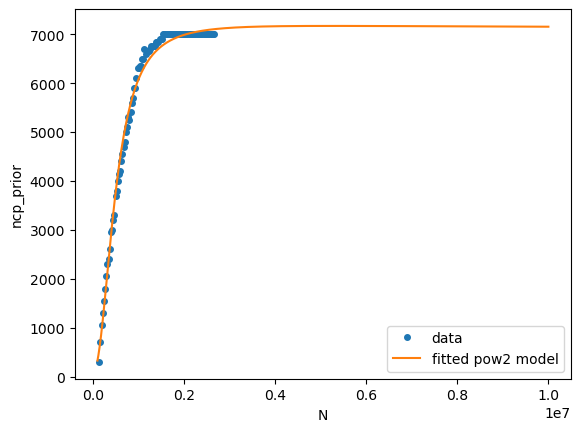

In [72]:
import matplotlib.pyplot as plt

u_test = np.linspace(1e5,1e7,1000)                           #valori test di N
y_test_pow_frac = model_pow_frac(res_pow_frac.x, u_test)
y_test_pow2 = model_pow2(res_pow2.x, u_test)
print(model_pow2(res_pow2.x,150000))
plt.plot(u, y, 'o', markersize=4, label='data')
#plt.plot(u_test, y_test_pow_frac, label='fitted pow_frac model')
plt.plot(u_test, y_test_pow2, label='fitted pow2 model')
plt.xlabel("N")
plt.ylabel("ncp_prior")
plt.legend(loc='lower right')
plt.show()

456.9357334427741


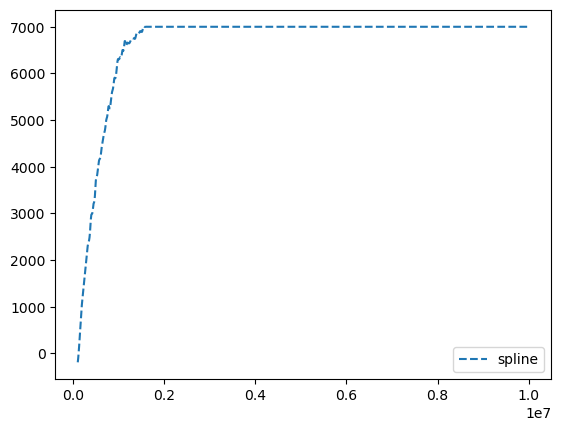

In [71]:
from scipy.interpolate import CubicSpline, PchipInterpolator, Akima1DInterpolator
import matplotlib.pyplot as plt

plt.plot(u_test, CubicSpline(u, y)(u_test), '--', label='spline')
#plt.plot(u_test, Akima1DInterpolator(u, y)(u_test), '-', label='Akima1D')
#plt.plot(u_test, PchipInterpolator(u, y)(u_test), '-', label='pchip')
#plt.plot(u, y, 'o')
print(CubicSpline(u, y)(150000))
plt.legend()
plt.show()